In [13]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

## Initialize Dataset

In [373]:
np.random.seed(14)

In [405]:
n_samples = 400
std_dev = 1.5

Y_mean = (6.5, 5.5)
N_mean = (3.0,2.0)

In [406]:
def generate_dataset(mean, std_dev):
    np.random.seed(14)
    x_axis = np.random.normal(loc=mean[0], scale=std_dev, size=int(n_samples/2))
    y_axis = np.random.normal(loc=mean[1], scale=std_dev, size=int(n_samples/2))
    return np.transpose((x_axis, y_axis))

In [407]:
Y_data = generate_dataset(Y_mean, std_dev)
N_data = generate_dataset(N_mean, std_dev)

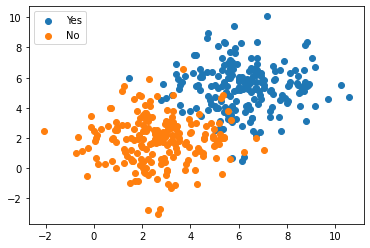

In [408]:
plt.scatter(Y_data[:,0], Y_data[:,1])
plt.scatter(N_data[:,0], N_data[:,1])
plt.legend(['Yes', 'No'])

In [409]:
Y_data = np.append(Y_data, np.ones((200,1)), axis=1)
N_data = np.append(N_data, np.zeros((200,1)), axis=1)

data = np.concatenate([Y_data, N_data])

In [410]:
print(data.shape)
print()
print(data[:5])
print()
print(data[-5:])

(400, 3)

[[8.82700867 8.38049208 1.        ]
 [6.61877904 4.5680135  1.        ]
 [6.76096479 8.34096156 1.        ]
 [6.39149515 4.18470989 1.        ]
 [3.4935059  5.93503598 1.        ]]

[[3.54191414 2.31483602 0.        ]
 [0.90956773 3.06165266 0.        ]
 [3.06859276 2.5918089  0.        ]
 [3.01753821 1.53954429 0.        ]
 [2.32080406 1.61804941 0.        ]]


**last column is the label**

## Split Train and Test Set

In [411]:
np.random.seed(14)
np.random.shuffle(data)

In [412]:
data[:10]

array([[ 3.64896198,  5.69586821,  1.        ],
       [ 4.74181731,  4.76673602,  1.        ],
       [ 6.61877904,  4.5680135 ,  1.        ],
       [ 0.0797832 ,  2.01743968,  0.        ],
       [ 3.23575753,  3.00722843,  1.        ],
       [ 5.73293541,  3.05106684,  1.        ],
       [ 5.03170394,  1.54092955,  0.        ],
       [ 3.5797832 ,  5.51743968,  1.        ],
       [ 7.42915277,  6.79353612,  1.        ],
       [ 5.2919024 , -0.39438921,  0.        ]])

In [414]:
train_ratio = 0.7

train_data = data[:int(0.7*n_samples)]
test_data = data[int(-0.3*n_samples):]

print(f'shape for X_train: {train_data.shape}')
print(f'shape for X_test: {test_data.shape}')

shape for X_train: (280, 3)
shape for X_test: (120, 3)


## Creating Model

- activation function: sigmoid
- loss function: sum of squared

In [499]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sigmoid_v = np.vectorize(sigmoid)

In [506]:
def apply_threshold(x, threshold=0.5):
    if x >= threshold:
        return 1.0
    else:
        return 0.0
    
apply_threshold_v = np.vectorize(apply_threshold)  

## Stochastic Gradient Descent v1

In [472]:
def stochastic_gradient_descent(data, alpha=0.01, iteration=2000, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    
    X = data[:,:3]
    y = data[:,-1]
    
    for current_iteration in range(iteration):
        sum_loss = 0.0
        sum_accuracy = []
        
        #select random sample
        i = np.random.randint(0, len(X))
        hx = sigmoid(np.dot(X[i], thetas.T))
        thetas = thetas - np.multiply(X[i], alpha*(2*(hx - y[i])*hx*(1 - hx)))
        
        # this loop is only to calculate the losses and accuracy
        for i in range(len(data)):
            hx = sigmoid(np.dot(X[i], thetas.T))
            sum_loss += (hx-y[i])**2
            predicted_y = apply_threshold(hx)
            sum_accuracy.append(predicted_y == y[i])
        
        
        accuracy = sum_accuracy.count(True)/len(X)
        print(f'Epoch: {current_iteration}')
        print(f'    losses: {sum_loss}')
        print(f'    accuracy: {accuracy}')
        
        thetas_history.append(thetas)
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        
    return loss_history, accuracy_history, thetas_history

In [475]:
loss_history, accuracy_history, thetas_history = stochastic_gradient_descent(train_data, alpha=0.1)

Epoch: 0
    losses: 125.07397745228585
    accuracy: 0.5178571428571429
Epoch: 1
    losses: 125.07399304813252
    accuracy: 0.5178571428571429
Epoch: 2
    losses: 125.07399304842909
    accuracy: 0.5178571428571429
Epoch: 3
    losses: 124.9151607671525
    accuracy: 0.5178571428571429
Epoch: 4
    losses: 124.91516076715787
    accuracy: 0.5178571428571429
Epoch: 5
    losses: 124.86491605333246
    accuracy: 0.5178571428571429
Epoch: 6
    losses: 124.86491607192387
    accuracy: 0.5178571428571429
Epoch: 7
    losses: 124.86491635261831
    accuracy: 0.5178571428571429
Epoch: 8
    losses: 124.82806894530133
    accuracy: 0.5178571428571429
Epoch: 9
    losses: 124.8280689457301
    accuracy: 0.5178571428571429
Epoch: 10
    losses: 124.82806894615877
    accuracy: 0.5178571428571429
Epoch: 11
    losses: 124.82807033883644
    accuracy: 0.5178571428571429
Epoch: 12
    losses: 124.8280703441026
    accuracy: 0.5178571428571429
Epoch: 13
    losses: 124.68623175447999
    accura

Epoch: 198
    losses: 55.65087110095883
    accuracy: 0.6785714285714286
Epoch: 199
    losses: 55.88161188841408
    accuracy: 0.6964285714285714
Epoch: 200
    losses: 55.89601506445915
    accuracy: 0.6964285714285714
Epoch: 201
    losses: 56.26920707907865
    accuracy: 0.6857142857142857
Epoch: 202
    losses: 69.87868761877554
    accuracy: 0.6178571428571429
Epoch: 203
    losses: 71.26668383814486
    accuracy: 0.6142857142857143
Epoch: 204
    losses: 63.87385855573573
    accuracy: 0.6392857142857142
Epoch: 205
    losses: 62.374786602912984
    accuracy: 0.6428571428571429
Epoch: 206
    losses: 62.38848339096967
    accuracy: 0.6428571428571429
Epoch: 207
    losses: 60.91727623029119
    accuracy: 0.6535714285714286
Epoch: 208
    losses: 60.43823127342535
    accuracy: 0.6607142857142857
Epoch: 209
    losses: 54.93268205465038
    accuracy: 0.6892857142857143
Epoch: 210
    losses: 58.18398743538531
    accuracy: 0.675
Epoch: 211
    losses: 54.784769448786
    accurac

Epoch: 383
    losses: 34.98996031972246
    accuracy: 0.8321428571428572
Epoch: 384
    losses: 36.58992470771943
    accuracy: 0.8
Epoch: 385
    losses: 32.82958420756111
    accuracy: 0.875
Epoch: 386
    losses: 35.0418894880413
    accuracy: 0.8285714285714286
Epoch: 387
    losses: 42.948818704730996
    accuracy: 0.7178571428571429
Epoch: 388
    losses: 51.40292319662694
    accuracy: 0.6785714285714286
Epoch: 389
    losses: 51.4505651671221
    accuracy: 0.6785714285714286
Epoch: 390
    losses: 51.53831810594942
    accuracy: 0.6785714285714286
Epoch: 391
    losses: 39.76843605527451
    accuracy: 0.7464285714285714
Epoch: 392
    losses: 33.28436756427912
    accuracy: 0.8428571428571429
Epoch: 393
    losses: 34.31165466523433
    accuracy: 0.8392857142857143
Epoch: 394
    losses: 33.03207021941294
    accuracy: 0.9428571428571428
Epoch: 395
    losses: 35.92827465825026
    accuracy: 0.8
Epoch: 396
    losses: 32.53773455561578
    accuracy: 0.8642857142857143
Epoch: 3

Epoch: 568
    losses: 32.29327764927418
    accuracy: 0.8214285714285714
Epoch: 569
    losses: 32.422834069709374
    accuracy: 0.8142857142857143
Epoch: 570
    losses: 28.337269055251433
    accuracy: 0.8928571428571429
Epoch: 571
    losses: 28.124349079213957
    accuracy: 0.9
Epoch: 572
    losses: 28.444948639462257
    accuracy: 0.8928571428571429
Epoch: 573
    losses: 28.953798467942185
    accuracy: 0.8785714285714286
Epoch: 574
    losses: 31.748749556711296
    accuracy: 0.8785714285714286
Epoch: 575
    losses: 31.992111699758784
    accuracy: 0.875
Epoch: 576
    losses: 42.465679079807266
    accuracy: 0.8107142857142857
Epoch: 577
    losses: 42.54010459964869
    accuracy: 0.8107142857142857
Epoch: 578
    losses: 28.25199185436584
    accuracy: 0.9071428571428571
Epoch: 579
    losses: 31.184226413133505
    accuracy: 0.8428571428571429
Epoch: 580
    losses: 33.41790782397181
    accuracy: 0.8214285714285714
Epoch: 581
    losses: 34.06799468177454
    accuracy: 0.

Epoch: 753
    losses: 23.526494819849816
    accuracy: 0.9571428571428572
Epoch: 754
    losses: 24.39612447044761
    accuracy: 0.9428571428571428
Epoch: 755
    losses: 24.068257923775626
    accuracy: 0.8964285714285715
Epoch: 756
    losses: 23.161046833379395
    accuracy: 0.9285714285714286
Epoch: 757
    losses: 25.543380097706322
    accuracy: 0.9357142857142857
Epoch: 758
    losses: 25.804521935763187
    accuracy: 0.9285714285714286
Epoch: 759
    losses: 23.798634585432005
    accuracy: 0.9428571428571428
Epoch: 760
    losses: 24.681538454141606
    accuracy: 0.8821428571428571
Epoch: 761
    losses: 28.22863669757327
    accuracy: 0.85
Epoch: 762
    losses: 27.86719632963381
    accuracy: 0.8535714285714285
Epoch: 763
    losses: 34.65305859612876
    accuracy: 0.8071428571428572
Epoch: 764
    losses: 34.737709137460186
    accuracy: 0.8035714285714286
Epoch: 765
    losses: 34.798574606267294
    accuracy: 0.8035714285714286
Epoch: 766
    losses: 34.89544578502619
  

Epoch: 935
    losses: 38.472145545939284
    accuracy: 0.7964285714285714
Epoch: 936
    losses: 45.72404504524653
    accuracy: 0.7357142857142858
Epoch: 937
    losses: 21.66856994052187
    accuracy: 0.9535714285714286
Epoch: 938
    losses: 21.6714553868573
    accuracy: 0.9535714285714286
Epoch: 939
    losses: 28.905319303944076
    accuracy: 0.875
Epoch: 940
    losses: 30.13474855050779
    accuracy: 0.8607142857142858
Epoch: 941
    losses: 33.825314400934495
    accuracy: 0.825
Epoch: 942
    losses: 21.752629453148703
    accuracy: 0.9357142857142857
Epoch: 943
    losses: 21.996973382339842
    accuracy: 0.9142857142857143
Epoch: 944
    losses: 21.979146154306047
    accuracy: 0.9142857142857143
Epoch: 945
    losses: 23.32834119249466
    accuracy: 0.9321428571428572
Epoch: 946
    losses: 24.24745290622945
    accuracy: 0.8857142857142857
Epoch: 947
    losses: 23.152708418068034
    accuracy: 0.9
Epoch: 948
    losses: 23.647790341442704
    accuracy: 0.896428571428571

Epoch: 1120
    losses: 24.175211370408647
    accuracy: 0.8821428571428571
Epoch: 1121
    losses: 24.193653404239633
    accuracy: 0.8821428571428571
Epoch: 1122
    losses: 21.99149567902514
    accuracy: 0.9071428571428571
Epoch: 1123
    losses: 21.92739752899629
    accuracy: 0.9107142857142857
Epoch: 1124
    losses: 21.033201516865425
    accuracy: 0.9428571428571428
Epoch: 1125
    losses: 20.649359192489545
    accuracy: 0.9392857142857143
Epoch: 1126
    losses: 21.804850607156723
    accuracy: 0.9285714285714286
Epoch: 1127
    losses: 30.676506041181245
    accuracy: 0.85
Epoch: 1128
    losses: 30.666567089506056
    accuracy: 0.85
Epoch: 1129
    losses: 21.452399695319244
    accuracy: 0.9285714285714286
Epoch: 1130
    losses: 23.242808886603243
    accuracy: 0.9035714285714286
Epoch: 1131
    losses: 20.674186022507193
    accuracy: 0.925
Epoch: 1132
    losses: 20.680342813471196
    accuracy: 0.925
Epoch: 1133
    losses: 20.668489172446034
    accuracy: 0.935714285

Epoch: 1318
    losses: 21.732448745059852
    accuracy: 0.9321428571428572
Epoch: 1319
    losses: 18.86222710398882
    accuracy: 0.9321428571428572
Epoch: 1320
    losses: 18.774865894727842
    accuracy: 0.95
Epoch: 1321
    losses: 19.444808846567398
    accuracy: 0.9464285714285714
Epoch: 1322
    losses: 19.73154760768829
    accuracy: 0.9392857142857143
Epoch: 1323
    losses: 19.019175754682653
    accuracy: 0.9464285714285714
Epoch: 1324
    losses: 18.902506736712656
    accuracy: 0.9357142857142857
Epoch: 1325
    losses: 18.961102388056233
    accuracy: 0.9464285714285714
Epoch: 1326
    losses: 25.704825246097066
    accuracy: 0.8857142857142857
Epoch: 1327
    losses: 19.536363895732944
    accuracy: 0.9428571428571428
Epoch: 1328
    losses: 19.597148075196596
    accuracy: 0.9428571428571428
Epoch: 1329
    losses: 19.234633896148853
    accuracy: 0.925
Epoch: 1330
    losses: 19.259719922808426
    accuracy: 0.925
Epoch: 1331
    losses: 18.680540915765288
    accurac

Epoch: 1499
    losses: 18.652605347374557
    accuracy: 0.9464285714285714
Epoch: 1500
    losses: 18.654173068219613
    accuracy: 0.9464285714285714
Epoch: 1501
    losses: 18.89348717008814
    accuracy: 0.9428571428571428
Epoch: 1502
    losses: 19.639536465256533
    accuracy: 0.9107142857142857
Epoch: 1503
    losses: 18.088668629434984
    accuracy: 0.9357142857142857
Epoch: 1504
    losses: 18.005189976766978
    accuracy: 0.9321428571428572
Epoch: 1505
    losses: 17.921615784596938
    accuracy: 0.9428571428571428
Epoch: 1506
    losses: 17.90605946695731
    accuracy: 0.9428571428571428
Epoch: 1507
    losses: 18.52388623945354
    accuracy: 0.9428571428571428
Epoch: 1508
    losses: 18.13831609948719
    accuracy: 0.9428571428571428
Epoch: 1509
    losses: 20.673086588183917
    accuracy: 0.8857142857142857
Epoch: 1510
    losses: 17.775220649677618
    accuracy: 0.95
Epoch: 1511
    losses: 17.776405601733504
    accuracy: 0.95
Epoch: 1512
    losses: 19.344447928673674
 

Epoch: 1672
    losses: 60.03682846064531
    accuracy: 0.625
Epoch: 1673
    losses: 60.48581438305761
    accuracy: 0.6178571428571429
Epoch: 1674
    losses: 60.49997550668085
    accuracy: 0.6178571428571429
Epoch: 1675
    losses: 24.4900093680848
    accuracy: 0.8821428571428571
Epoch: 1676
    losses: 22.394471928683256
    accuracy: 0.8964285714285715
Epoch: 1677
    losses: 21.20571568012571
    accuracy: 0.9178571428571428
Epoch: 1678
    losses: 17.942266652158057
    accuracy: 0.9428571428571428
Epoch: 1679
    losses: 17.81821769025402
    accuracy: 0.9428571428571428
Epoch: 1680
    losses: 17.609914793862128
    accuracy: 0.9428571428571428
Epoch: 1681
    losses: 17.686296842740017
    accuracy: 0.9321428571428572
Epoch: 1682
    losses: 17.639920211255212
    accuracy: 0.9392857142857143
Epoch: 1683
    losses: 17.657640255533316
    accuracy: 0.9357142857142857
Epoch: 1684
    losses: 21.913430236073328
    accuracy: 0.9071428571428571
Epoch: 1685
    losses: 21.99384

Epoch: 1855
    losses: 18.286369718597822
    accuracy: 0.9142857142857143
Epoch: 1856
    losses: 21.748940623233604
    accuracy: 0.9
Epoch: 1857
    losses: 21.77488196460887
    accuracy: 0.9
Epoch: 1858
    losses: 21.894935723379817
    accuracy: 0.9
Epoch: 1859
    losses: 21.902687940390834
    accuracy: 0.9
Epoch: 1860
    losses: 21.92140658019433
    accuracy: 0.9
Epoch: 1861
    losses: 20.62723212456636
    accuracy: 0.9035714285714286
Epoch: 1862
    losses: 19.670810551081388
    accuracy: 0.9071428571428571
Epoch: 1863
    losses: 19.818119858177912
    accuracy: 0.9071428571428571
Epoch: 1864
    losses: 19.84946856672235
    accuracy: 0.9071428571428571
Epoch: 1865
    losses: 19.847681697805537
    accuracy: 0.9071428571428571
Epoch: 1866
    losses: 20.21024154565851
    accuracy: 0.9071428571428571
Epoch: 1867
    losses: 17.996774077175207
    accuracy: 0.925
Epoch: 1868
    losses: 17.993340718148634
    accuracy: 0.925
Epoch: 1869
    losses: 18.87715268183529


Text(0, 0.5, 'Sum of Squared Error')

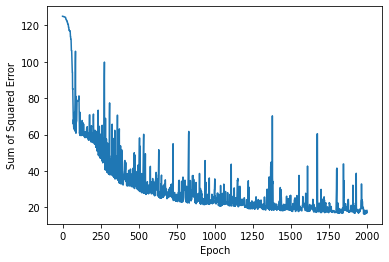

In [476]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

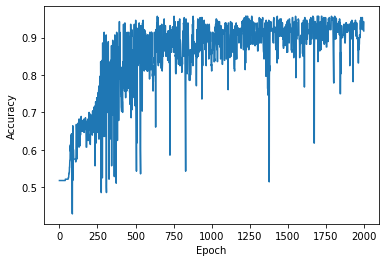

In [477]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

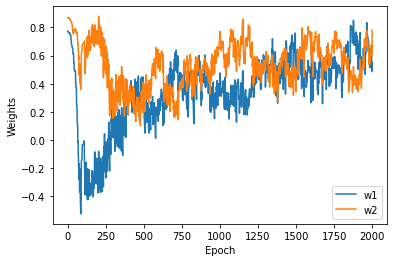

In [478]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])

## Stochastic Gradient Descent v2

In [450]:
def online_stochastic_gradient_descent(data, alpha=0.01, epoch=100, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    
    for current_epoch in range(epoch):
        sum_loss = 0.0
        sum_accuracy = []
        
        #shuffle to prevent cycles
        np.random.seed(14)
        np.random.shuffle(data)
        X = data[:,:3]
        y = data[:,-1]
        
        for i in range(len(data)):
            hx = sigmoid(np.dot(X[i], thetas.T))
            thetas = thetas - np.multiply(X[i], alpha*(2*(hx - y[i])*hx*(1 - hx)))
            
            sum_loss += (hx-y[i])**2
            predicted_y = apply_threshold(hx)
            sum_accuracy.append(predicted_y == y[i])
            
        accuracy = sum_accuracy.count(True)/len(X)
        print(f'Epoch: {current_epoch}')
        print(f'    losses: {sum_loss}')
        print(f'    accuracy: {accuracy}')
        
        thetas_history.append(thetas)
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        
    return loss_history, accuracy_history, thetas_history

In [451]:
loss_history, accuracy_history, thetas_history = online_stochastic_gradient_descent(train_data)

Epoch: 0
    losses: 123.20887026960385
    accuracy: 0.5178571428571429
Epoch: 1
    losses: 114.52229699985233
    accuracy: 0.5214285714285715
Epoch: 2
    losses: 73.45585954219793
    accuracy: 0.5892857142857143
Epoch: 3
    losses: 57.231655022925004
    accuracy: 0.6535714285714286
Epoch: 4
    losses: 54.08582382201406
    accuracy: 0.6714285714285714
Epoch: 5
    losses: 50.618891788041445
    accuracy: 0.6964285714285714
Epoch: 6
    losses: 47.19135378609151
    accuracy: 0.75
Epoch: 7
    losses: 44.068281394234006
    accuracy: 0.7964285714285714
Epoch: 8
    losses: 42.06118210482242
    accuracy: 0.8035714285714286
Epoch: 9
    losses: 39.610368213938195
    accuracy: 0.8464285714285714
Epoch: 10
    losses: 38.072135539403796
    accuracy: 0.8607142857142858
Epoch: 11
    losses: 35.89968527621775
    accuracy: 0.8607142857142858
Epoch: 12
    losses: 34.615738601364306
    accuracy: 0.8785714285714286
Epoch: 13
    losses: 33.34176182089913
    accuracy: 0.89285714285

In [339]:
loss_history, accuracy_history, thetas_history = batch_gradient_descent(train_data)

Epoch: 0
    losses: 130.85661665414563
    accuracy: 0.49642857142857144
Epoch: 1
    losses: 123.01535163946437
    accuracy: 0.49642857142857144
Epoch: 2
    losses: 77.85064176718635
    accuracy: 0.5857142857142857
Epoch: 3
    losses: 57.43703919090382
    accuracy: 0.6857142857142857
Epoch: 4
    losses: 54.057351123368605
    accuracy: 0.7107142857142857
Epoch: 5
    losses: 51.132275734744745
    accuracy: 0.7142857142857143
Epoch: 6
    losses: 48.04692909807956
    accuracy: 0.7642857142857142
Epoch: 7
    losses: 46.1319491015973
    accuracy: 0.7714285714285715
Epoch: 8
    losses: 43.57518158712079
    accuracy: 0.7964285714285714
Epoch: 9
    losses: 42.028940314817355
    accuracy: 0.8107142857142857
Epoch: 10
    losses: 39.87059522844754
    accuracy: 0.8285714285714286
Epoch: 11
    losses: 38.17149000999186
    accuracy: 0.8535714285714285
Epoch: 12
    losses: 36.339661772809485
    accuracy: 0.8571428571428571
Epoch: 13
    losses: 35.04186165673503
    accuracy: 

Text(0, 0.5, 'Sum of Squared Error')

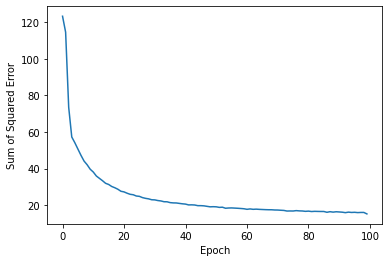

In [452]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

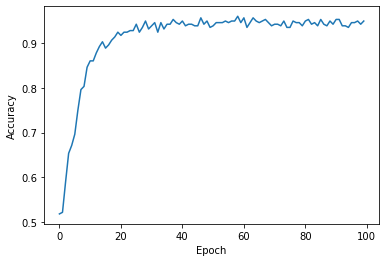

In [453]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

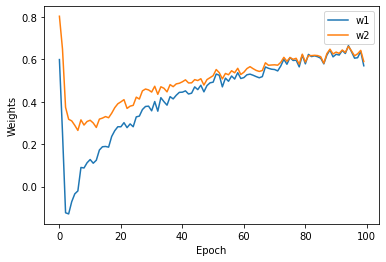

In [454]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])

## Batch Gradient Descent

In [696]:
def batch_gradient_descent(data, alpha=0.01, epoch=100, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    for current_epoch in range(epoch):
        sum_loss = 0.0
        sum_accuracy = []
        
        #shuffle to prevent cycles
        np.random.seed(14)
        np.random.shuffle(data)
        X = data[:,:3]
        y = data[:,-1]
        hx = sigmoid_v(np.dot(X, thetas.T))
        sum_loss = ((hx-y)**2).sum()
        
        predicted_y = apply_threshold_v(hx)
        sum_accuracy = predicted_y == y
        thetas = thetas - alpha*np.sum(((2*(hx - y)*hx*(1 - hx)).reshape(-1, 1) * X), axis=0)

        accuracy = np.sum(sum_accuracy)/len(X)
        print(f'Epoch: {current_epoch}')
        print(f'    losses: {sum_loss}')
        print(f'    accuracy: {accuracy}')
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        thetas_history.append(thetas)

    return loss_history, accuracy_history, thetas_history

In [701]:
loss_history, accuracy_history, thetas_history = batch_gradient_descent(train_data, alpha=0.001, epoch=200)

Epoch: 0
    losses: 125.07397728961439
    accuracy: 0.5178571428571429
Epoch: 1
    losses: 124.77802064349669
    accuracy: 0.5178571428571429
Epoch: 2
    losses: 124.46080090681478
    accuracy: 0.5178571428571429
Epoch: 3
    losses: 124.11979548496981
    accuracy: 0.5178571428571429
Epoch: 4
    losses: 123.75205834818152
    accuracy: 0.5178571428571429
Epoch: 5
    losses: 123.35412686191859
    accuracy: 0.5178571428571429
Epoch: 6
    losses: 122.92190292326441
    accuracy: 0.5178571428571429
Epoch: 7
    losses: 122.45049978570063
    accuracy: 0.5178571428571429
Epoch: 8
    losses: 121.93404251736936
    accuracy: 0.5214285714285715
Epoch: 9
    losses: 121.36540499873274
    accuracy: 0.5214285714285715
Epoch: 10
    losses: 120.73585886660794
    accuracy: 0.5214285714285715
Epoch: 11
    losses: 120.03459847471146
    accuracy: 0.5214285714285715
Epoch: 12
    losses: 119.2480885183883
    accuracy: 0.5214285714285715
Epoch: 13
    losses: 118.35915374347746
    accu

Text(0, 0.5, 'Sum of Squared Error')

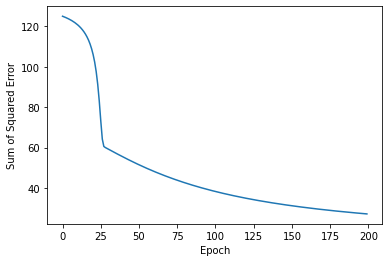

In [702]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

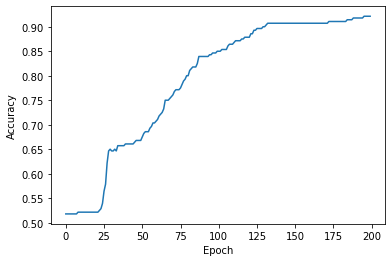

In [703]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

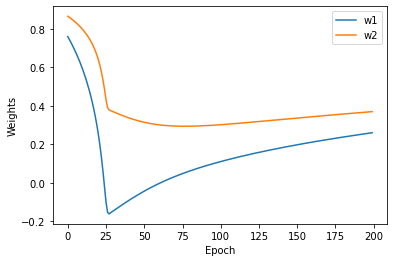

In [704]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])